In [1]:
!pip list

# Basics and pre processing

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [4]:
data_path = "D:/DownLoads/spg.csv"
df = pd.read_csv(data_path)

In [5]:
print(df)

      temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd   
0                          2.17                               31  \
1                          2.31                               27   
2                          3.65                               33   
3                          5.82                               30   
4                          7.73                               27   
...                         ...                              ...   
4208                       8.69                               66   
4209                       7.57                               90   
4210                       7.27                               90   
4211                       8.25                               81   
4212                       8.00                               80   

      mean_sea_level_pressure_MSL  total_precipitation_sfc   
0                          1035.0                      0.0  \
1                          1035.1                      0.0 

In [6]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [7]:
df.shape

(4213, 21)

In [8]:
X = df.iloc[:, 0:20]
y = df.iloc[:, 20]

In [9]:
print('NaN/Null values in train are {}'.format(X.isnull().values.sum()))
print('NaN/Null values in test are {}'.format(y.isnull().values.sum()))


print('No of duplicates in train: {}'.format(sum(X.duplicated())))

df=df.dropna()

NaN/Null values in train are 0
NaN/Null values in test are 0
No of duplicates in train: 0


In [10]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
PredictorScalerFit=PredictorScaler.fit(X)
X=PredictorScalerFit.transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train_ann, X_val_ann, y_train_ann, y_val_ann = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(3370, 20)

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# A sample ANN without hyperparameter tuning

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8

In [15]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/50
106/106 [==============================] - 2s 5ms/step - loss: 787704.2500
Epoch 2/50
106/106 [==============================] - 1s 6ms/step - loss: 240431.9219
Epoch 3/50
106/106 [==============================] - 1s 6ms/step - loss: 217493.9844
Epoch 4/50
106/106 [==============================] - 1s 5ms/step - loss: 210048.0625
Epoch 5/50
106/106 [==============================] - 0s 3ms/step - loss: 202979.3594
Epoch 6/50
106/106 [==============================] - 0s 5ms/step - loss: 189812.5625
Epoch 7/50
106/106 [==============================] - 1s 6ms/step - loss: 186634.2031
Epoch 8/50
106/106 [==============================] - 0s 3ms/step - loss: 176751.8594
Epoch 9/50
106/106 [==============================] - 1s 7ms/step - loss: 175725.3906
Epoch 10/50
106/106 [==============================] - 0s 3ms/step - loss: 172749.0312
Epoch 11/50
106/106 [==============================] - 0s 3ms/step - loss: 173079.1719
Epoch 12/50
106/106 [==============================]

In [16]:
y_pred = model.predict(X_test_scaled)

27/27 [==============================] - 0s 3ms/step


In [17]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.7950109171323991


# Gradient Boosting Regression without hyperparameter tuning

In [18]:
def plot_feature_importance(reg,df):
  feature_importance = reg.feature_importances_
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  fig = plt.figure(figsize=(12, 6))
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  plt.yticks(pos, np.array(df.columns[0:])[sorted_idx])
  plt.title('Feature Importance')

In [19]:
params = {'n_estimators': 100,
          'max_depth': 4,
          'min_samples_split': 3,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

In [20]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [21]:
reg_runtime = ensemble.GradientBoostingRegressor(**params)
reg_runtime.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg_runtime.predict(X_test))
print("The mean squared error (MSE) for runtime is: {:.4f}".format(mse))

The mean squared error (MSE) for runtime is: 326670.2288


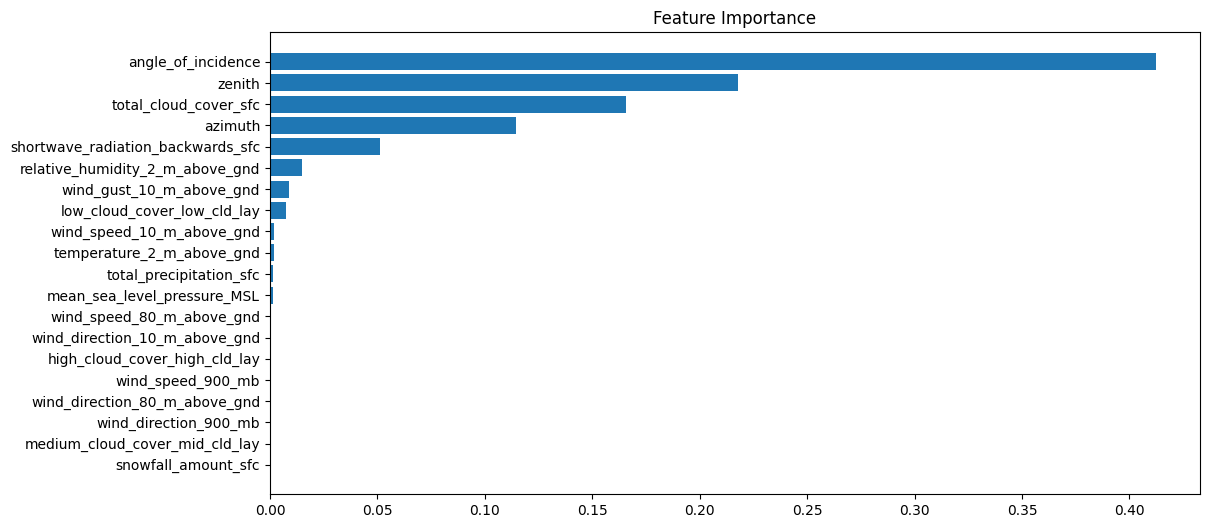

In [22]:
plot_feature_importance(reg_runtime, df)

In [23]:
y_pred_gb = reg_runtime.predict(X_test)

In [24]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_gb))

0.6423829377080243


# Hyperparameter tuning of a Gradient Boosting Regressor Using GA

In [25]:
def fitness_eval_grad(hyparams):
  regressor = ensemble.GradientBoostingRegressor(n_estimators=hyparams[0],max_depth=hyparams[1], min_samples_split=hyparams[2],learning_rate=hyparams[3],loss=hyparams[4])
  regressor.fit(X_train, y_train)
  return(r2_score(regressor.predict(X_test), y_pred))

In [26]:
def selection_grad(n, list_ind):
  list_r2 = []
  for i in list_ind:
    list_r2.append(fitness_eval_grad(i))
  list_ind_sorted = [x for _,x in sorted(zip(list_r2, list_ind), reverse=True)]
  return list_ind_sorted[:n]


In [27]:
import random

def crossover_grad_sp(population, n_crossovers, mutation_rate):
    # Create a copy of the original population
    new_population = population.copy()
    # Perform n_crossovers crossovers
    for i in range(n_crossovers):
        # Choose two distinct parents at random
        parent1, parent2 = random.sample(population, 2)
        # Choose a crossover point at random
        crossover_point = random.randint(1, len(parent1) - 1)
        # Perform crossover by swapping the tails of the parents
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        # Add the new children to the population
        new_population.append(child1)
        new_population.append(child2)
    # Perform mutation on the new population
    for i in range(len(new_population)):
        if random.random() < mutation_rate:
            # Choose a random hyperparameter to mutate
            hyperparameter_idx = random.randint(0, len(new_population[i]) - 1)
            # Mutate the chosen hyperparameter
            if hyperparameter_idx == 0: # n_estimators
                new_population[i][hyperparameter_idx] = random.randint(50, 1000)
            elif hyperparameter_idx == 1: # max_depth
                new_population[i][hyperparameter_idx] = random.randint(2, 20)
            elif hyperparameter_idx == 2: # min_samples_split
                new_population[i][hyperparameter_idx] = random.randint(2, 20)
            elif hyperparameter_idx == 3: # learning_rate
                new_population[i][hyperparameter_idx] = random.uniform(0.01, 0.2)
            elif hyperparameter_idx == 4: # loss
                new_population[i][hyperparameter_idx] = random.choice(['quantile', 'absolute_error', 'squared_error', 'huber'])
    # Return the new population
    return new_population



In [28]:
import random

def create_population_grad(population_size):
    population = []
    for i in range(population_size):
        # Generate a random individual
        n_estimators = random.randint(50, 1000)
        max_depth = random.randint(2, 20)
        min_samples_split = random.randint(2, 20)
        learning_rate = random.uniform(0.01, 0.2)
        loss = random.choice(['quantile', 'absolute_error', 'squared_error', 'huber'])
        individual = [n_estimators, max_depth, min_samples_split, learning_rate, loss]
        # Add the individual to the population
        population.append(individual)
    return population


In [29]:
#Implementing the genetic algorithm search to find the approximate best set of parameters for the gradient boosting regression algorithm

num_gen = 3
pop_size = 5
num_cross = 5
mr = 0.1
init_pop = create_population_grad(pop_size)
new_pop = init_pop
while(num_gen > 0):
  num_gen = num_gen - 1
  new_gen = crossover_grad_sp(new_pop, num_cross, mr)
  new_pop = selection_grad(pop_size, new_gen)
params = new_pop[0]

In [30]:
bestparams = new_pop[0]

In [31]:
bestparams

[287, 6, 15, 0.06997182991301101, 'huber']

In [32]:
regressor = ensemble.GradientBoostingRegressor(n_estimators=bestparams[0],max_depth=bestparams[1], min_samples_split=bestparams[2],learning_rate=bestparams[3],loss=bestparams[4])
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [33]:
print(r2_score(y_test, y_pred))

0.8218461123663399


# Hyperparameter tuning of ANN using GA

format of ann parameters - 
learning_rate = 0.01 ann_params[0]        
num_hidden_layers = 2 ann_params[1]     
num_neurons = 128 ann_params[2]      
activation_function = 'relu' ann_params[3]       
dropout_rate = 0.2 ann_params[4]        
loss_function = 'categorical_crossentropy' ann_params[5]        
optimizer_list = [SGD(lr=learning_rate), Adam(lr=learning_rate), RMSprop(lr=learning_rate)] ann_params[6]

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import random

In [35]:
def eval_fitness_ann(ann_params):
  learning_rate = ann_params[0]
  num_neurons = ann_params[1]
  activation_function = ann_params[2]
  dropout_rate = ann_params[3]
  loss_function = ann_params[4]
  num_hidden_layers = ann_params[5]
  optimizer = ann_params[6]

  print("using these hyperparams : " , ann_params)

  model = Sequential()

  # Add the input layer and first hidden layer
  model.add(Dense(num_neurons, input_dim=20, activation=activation_function))
  model.add(Dropout(dropout_rate))

  # Add the remaining hidden layers
  for i in range(num_hidden_layers - 1):
      model.add(Dense(num_neurons, activation=activation_function))
  
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, activation = 'linear'))

  model.compile(loss=loss_function, optimizer=optimizer)
  model.fit(X_train_scaled, y_train, epochs = 50, batch_size=32, verbose = 1)
  return(r2_score(y_test, model.predict(X_test_scaled)))

In [60]:
learning_rate_range = [0.001, 0.01, 0.1]
num_neurons_range = [256, 512, 1024]
activation_function_range = ['relu', 'sigmoid', 'tanh']
dropout_rate_range = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
loss_function_range = ['huber', 'mse', 'mae']
num_hidden_layers_range = [4, 5, 6]
optimizer_range = ['adam', 'rmsprop', 'adagrad', 'nadam']

ranges_ann = [learning_rate_range, num_neurons_range, activation_function_range, dropout_rate_range, loss_function_range, num_hidden_layers_range, optimizer_range]

In [61]:
def create_individual_ann():
    return [
        random.choice(learning_rate_range),
        random.choice(num_neurons_range),
        random.choice(activation_function_range),
        random.choice(dropout_rate_range),
        random.choice(loss_function_range),
        random.choice(num_hidden_layers_range),
        random.choice(optimizer_range)
    ]

In [62]:
def create_population_ann(pop_size):
    population = []
    for i in range(pop_size):
        individual = create_individual_ann()
        population.append(individual)
    return population

In [63]:
def crossover_ann_sp(population, num_crossovers, mutation_rate):
    new_population = population.copy()
    for i in range(num_crossover):
      idx1 = random.randint(0, len(population) - 1)
      idx2 = random.randint(0, len(population) - 1)
      while(idx1 == idx2):
        idx2 = random.randint(0, len(population) - 1)
      ind1 = population[idx1]
      ind2 = population[idx2]
      crossover_point = random.randint(1, len(ind1) - 1)
      child1 = ind1[:crossover_point] + ind2[crossover_point:]
      child2 = ind2[:crossover_point] + ind1[crossover_point:]
      for i in range(len(new_population)):
        if random.random() < mutation_rate:
            # Choose a random hyperparameter to mutate
            hyperparameter_idx = random.randint(0, len(new_population[i]) - 1)
            # Mutate the chosen hyperparameter
            new_population[i][hyperparameter_idx] = random.choice(ranges_ann[hyperparameter_idx])
    return new_population

In [64]:
def selection_ann(n, list_ind):
  list_r2 = []
  for i in list_ind:
    list_r2.append(eval_fitness_ann(i))
  list_ind_sorted = [x for _,x in sorted(zip(list_r2, list_ind), reverse=True)]
  return list_ind_sorted[:n]

In [65]:
num_gen = 4
num_crossover = 5
pop_size = 5
init_pop = create_population_ann(pop_size)
curr_pop = init_pop
mr = 0.1
while(num_gen > 0):
  num_gen = num_gen - 1
  new_gen = crossover_ann_sp(curr_pop, num_crossover, mr)
  curr_pop = selection_ann(pop_size, new_gen)
best_params = curr_pop[0]

using these hyperparams :  [0.001, 1024, 'sigmoid', 0.4, 'mae', 6, 'rmsprop']
Epoch 1/50
106/106 [==============================] - 8s 70ms/step - loss: 1093.0804
Epoch 2/50
106/106 [==============================] - 8s 72ms/step - loss: 1051.5012
Epoch 3/50
106/106 [==============================] - 8s 72ms/step - loss: 1011.6209
Epoch 4/50
106/106 [==============================] - 8s 75ms/step - loss: 973.4219
Epoch 5/50
106/106 [==============================] - 8s 72ms/step - loss: 940.4034
Epoch 6/50
106/106 [==============================] - 8s 71ms/step - loss: 911.4594
Epoch 7/50
106/106 [==============================] - 8s 73ms/step - loss: 887.3454
Epoch 8/50
106/106 [==============================] - 7s 71ms/step - loss: 870.3834
Epoch 9/50
106/106 [==============================] - 8s 72ms/step - loss: 858.0821
Epoch 10/50
106/106 [==============================] - 7s 71ms/step - loss: 850.6736
Epoch 11/50
106/106 [==============================] - 8s 74ms/step - loss: 84

In [66]:
learning_rate = best_params[0]
num_neurons = best_params[1]
activation_function = best_params[2]
dropout_rate = best_params[3]
loss_function = best_params[4]
num_hidden_layers = best_params[5]
optimizer = best_params[6]

model = Sequential()

# Add the input layer and first hidden layer
model.add(Dense(num_neurons, input_dim=20, activation=activation_function))
model.add(Dropout(dropout_rate))

# Add the remaining hidden layers
for i in range(num_hidden_layers - 1):
    model.add(Dense(num_neurons, activation=activation_function))

model.add(Dropout(dropout_rate))
model.add(Dense(1, activation = 'linear'))

model.compile(loss=loss_function, optimizer=optimizer)
model.fit(X_train_scaled, y_train, epochs = 100, batch_size=32, verbose = 1)

Epoch 1/100
106/106 [==============================] - 3s 17ms/step - loss: 517.6201
Epoch 2/100
106/106 [==============================] - 2s 17ms/step - loss: 344.5642
Epoch 3/100
106/106 [==============================] - 2s 17ms/step - loss: 325.9951
Epoch 4/100
106/106 [==============================] - 2s 17ms/step - loss: 314.0001
Epoch 5/100
106/106 [==============================] - 2s 17ms/step - loss: 310.8299
Epoch 6/100
106/106 [==============================] - 2s 17ms/step - loss: 306.6168
Epoch 7/100
106/106 [==============================] - 2s 17ms/step - loss: 293.9324
Epoch 8/100
106/106 [==============================] - 2s 17ms/step - loss: 282.9129
Epoch 9/100
106/106 [==============================] - 2s 17ms/step - loss: 289.6589
Epoch 10/100
106/106 [==============================] - 2s 17ms/step - loss: 282.5285
Epoch 11/100
106/106 [==============================] - 2s 17ms/step - loss: 276.7049
Epoch 12/100
106/106 [==============================] - 2s 17ms

In [67]:
y_pred = model.predict(X_test_scaled)

27/27 [==============================] - 0s 3ms/step


In [68]:
r2_score(y_test, y_pred)

0.797956955595078

We saw that tuning the hyperparameters of an ANN was a long and the results not that great. Now we will use different crossover techniques to tune the hyperparameters of a gradient boosting regressor

# Uniform and n point Crossover

In [69]:
def fitness_eval_grad(hyparams):
  regressor = ensemble.GradientBoostingRegressor(n_estimators=hyparams[0],max_depth=hyparams[1], min_samples_split=hyparams[2],learning_rate=hyparams[3],loss=hyparams[4])
  regressor.fit(X_train, y_train)
  return(r2_score(regressor.predict(X_test), y_pred))

In [70]:
def selection_grad(n, list_ind):
  list_r2 = []
  for i in list_ind:
    list_r2.append(fitness_eval_grad(i))
  list_ind_sorted = [x for _,x in sorted(zip(list_r2, list_ind), reverse=True)]
  return list_ind_sorted[:n]

In [79]:
def crossover_grad_uniform(population, n_crossovers, mutation_rate):
    # Create a copy of the original population
    new_population = population.copy()
    # Perform n_crossovers crossovers
    for i in range(n_crossovers):
        # Choose two distinct parents at random
        parent1, parent2 = random.sample(population, 2)
        child = parent1
        for i in range(len(parent1)):
          choice = random.randint(1, 2)
          if(choice == 1):
            child[i] = parent1[i]
          else:
            child[i] = parent2[i]
        # Add the new children to the population
        new_population.append(child)
    # Perform mutation on the new population
    for i in range(len(new_population)):
        if random.random() < mutation_rate:
            # Choose a random hyperparameter to mutate
            hyperparameter_idx = random.randint(0, len(new_population[i]) - 1)
            # Mutate the chosen hyperparameter
            if hyperparameter_idx == 0: # n_estimators
                new_population[i][hyperparameter_idx] = random.randint(50, 1000)
            elif hyperparameter_idx == 1: # max_depth
                new_population[i][hyperparameter_idx] = random.randint(2, 20)
            elif hyperparameter_idx == 2: # min_samples_split
                new_population[i][hyperparameter_idx] = random.randint(2, 20)
            elif hyperparameter_idx == 3: # learning_rate
                new_population[i][hyperparameter_idx] = random.uniform(0.01, 0.2)
            elif hyperparameter_idx == 4: # loss
                new_population[i][hyperparameter_idx] = random.choice(['quantile', 'absolute_error', 'squared_error', 'huber'])
    # Return the new population
    return new_population

In [80]:
def crossover_grad_n_point(population, n_crossovers, mutation_rate, n):
    # Create a copy of the original population
    new_population = population.copy()
    # Perform n_crossovers crossovers
    for i in range(n_crossovers):
        # Choose two distinct parents at random
        parent1, parent2 = random.sample(population, 2)
        # Generate n random crossover points
        crossover_points = sorted(random.sample(range(1, len(parent1)), n))
        child1 = parent1.copy()
        child2 = parent2.copy()
        for point in crossover_points:
            # Perform crossover at each crossover point
            child1[point:] = parent2[point:]
            child2[point:] = parent1[point:]
        # Add the new children to the population
        new_population.append(child1)
        new_population.append(child2)
    # Perform mutation on the new population
    for i in range(len(new_population)):
        if random.random() < mutation_rate:
            # Choose a random hyperparameter to mutate
            hyperparameter_idx = random.randint(0, len(new_population[i]) - 1)
            # Mutate the chosen hyperparameter
            if hyperparameter_idx == 0: # n_estimators
                new_population[i][hyperparameter_idx] = random.randint(50, 1000)
            elif hyperparameter_idx == 1: # max_depth
                new_population[i][hyperparameter_idx] = random.randint(2, 20)
            elif hyperparameter_idx == 2: # min_samples_split
                new_population[i][hyperparameter_idx] = random.randint(2, 20)
            elif hyperparameter_idx == 3: # learning_rate
                new_population[i][hyperparameter_idx] = random.uniform(0.01, 0.2)
            elif hyperparameter_idx == 4: # loss
                new_population[i][hyperparameter_idx] = random.choice(['quantile', 'absolute_error', 'squared_error', 'huber'])
    # Return the new population
    return new_population


In [81]:
def create_population_grad(population_size):
    population = []
    for i in range(population_size):
        # Generate a random individual
        n_estimators = random.randint(50, 1000)
        max_depth = random.randint(2, 20)
        min_samples_split = random.randint(2, 20)
        learning_rate = random.uniform(0.01, 0.2)
        loss = random.choice(['quantile', 'absolute_error', 'squared_error', 'huber'])
        individual = [n_estimators, max_depth, min_samples_split, learning_rate, loss]
        # Add the individual to the population
        population.append(individual)
    return population

In [83]:
num_gen = 3
pop_size = 5
num_cross = 5
mr = 0.1
init_pop = create_population_grad(pop_size)
new_pop = init_pop
while(num_gen > 0):
  print("first generation")
  num_gen = num_gen - 1
  new_gen = crossover_grad_uniform(new_pop, num_cross, mr)
  new_pop = selection_grad(pop_size, new_gen)
params = new_pop[0]

first generation
first generation
first generation


In [84]:
bestparams = new_pop[0]
print(bestparams)

[464, 12, 20, 0.12666669356005764, 'absolute_error']


In [85]:
regressor = ensemble.GradientBoostingRegressor(n_estimators=bestparams[0],max_depth=bestparams[1], min_samples_split=bestparams[2],learning_rate=bestparams[3],loss=bestparams[4])
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [86]:
print(r2_score(y_pred, y_test))

0.7827638740699946


In [88]:
num_gen = 3
pop_size = 5
num_cross = 5
mr = 0.1
n = 3
init_pop = create_population_grad(pop_size)
new_pop = init_pop
while(num_gen > 0):
  print("generation",num_gen)
  num_gen = num_gen - 1
  new_gen = crossover_grad_n_point(new_pop, num_cross, mr, n)
  new_pop = selection_grad(pop_size, new_gen)
params = new_pop[0]

generation 3
generation 2
generation 1


In [92]:
bestparams = new_pop[0]
print(bestparams)
regressor = ensemble.GradientBoostingRegressor(n_estimators=bestparams[0],max_depth=bestparams[1], min_samples_split=bestparams[2],learning_rate=bestparams[3],loss=bestparams[4])
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

[905, 16, 11, 0.01394445686878295, 'absolute_error']


In [90]:
print(r2_score(y_pred, y_test))

0.7941162789018652


In [91]:
def plotgraph(y_test, y_pred):
  plt.ylabel(("Predicted"))
  plt.xlabel("Actual")
  plt.scatter(y_test, y_pred, color = 'green', label = 'predicted values', s = 2)
  plt.axline([10,10], [35,35], label = 'actual values')
  plt.legend(loc = "upper left")
  plt.show()

In [15]:
best_params_gb_sp = [287, 6, 15, 0.06997182991301101, 'huber']
best_params_gb_uc = [464, 12, 20, 0.12666669356005764, 'absolute_error']
best_params_gb_np = [905, 16, 11, 0.01394445686878295, 'absolute_error']

In [94]:
reg_gb_sp = ensemble.GradientBoostingRegressor(n_estimators=best_params_gb_sp[0],max_depth=best_params_gb_sp[1], min_samples_split=best_params_gb_sp[2],learning_rate=best_params_gb_sp[3],loss=best_params_gb_sp[4])
reg_gb_sp.fit(X_train, y_train)
y_pred_gb_sp = reg_gb_sp.predict(X_test)

In [97]:
import matplotlib.pyplot as plt

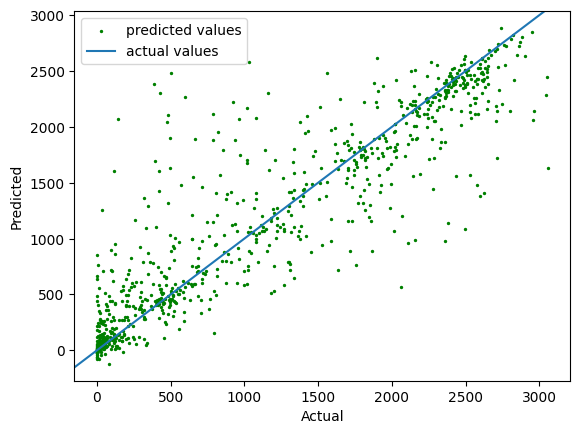

In [98]:
plotgraph(y_test, y_pred_gb_sp)

In [99]:
reg_gb_uc = ensemble.GradientBoostingRegressor(n_estimators=best_params_gb_uc[0],max_depth=best_params_gb_uc[1], min_samples_split=best_params_gb_uc[2],learning_rate=best_params_gb_uc[3],loss=best_params_gb_uc[4])
reg_gb_uc.fit(X_train, y_train)
y_pred_gb_uc = reg_gb_uc.predict(X_test)

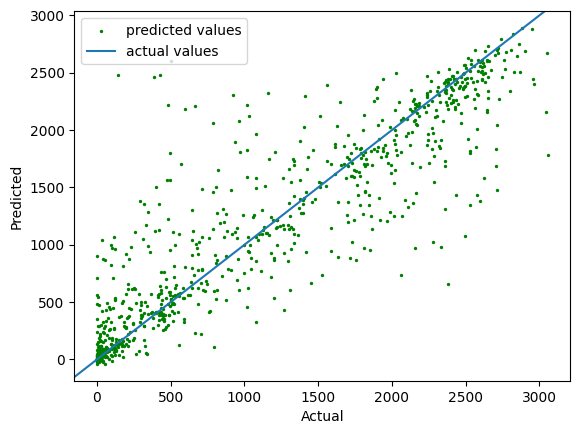

In [100]:
plotgraph(y_test, y_pred_gb_uc)

In [17]:
from sklearn import ensemble
reg_gb_np = ensemble.GradientBoostingRegressor(n_estimators=best_params_gb_np[0],max_depth=best_params_gb_np[1], min_samples_split=best_params_gb_np[2],learning_rate=best_params_gb_np[3],loss=best_params_gb_np[4])
reg_gb_np.fit(X_train, y_train)
y_pred_gb_np = reg_gb_np.predict(X_test)

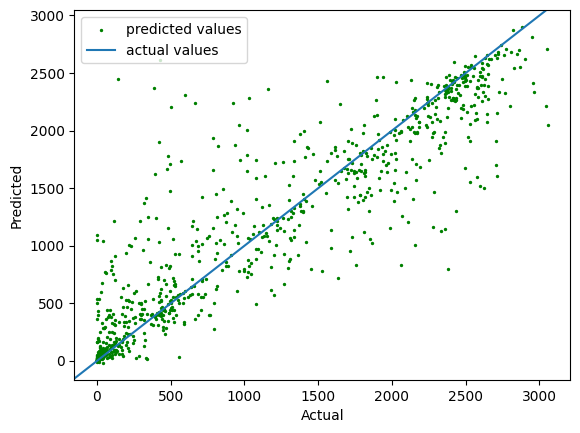

In [102]:
plotgraph(y_test, y_pred_gb_np)

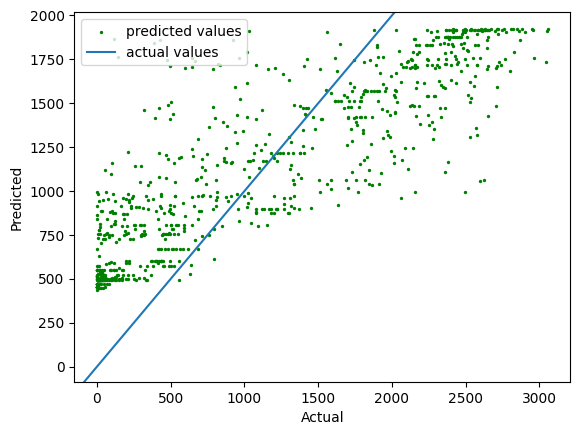

In [114]:
plotgraph(y_test, reg_runtime.predict(X_test))

In [120]:
learning_rate = best_params[0]
num_neurons = best_params[1]
activation_function = best_params[2]
dropout_rate = best_params[3]
loss_function = best_params[4]
num_hidden_layers = best_params[5]
optimizer = best_params[6]

model = Sequential()

# Add the input layer and first hidden layer
model.add(Dense(num_neurons, input_dim=20, activation=activation_function))
model.add(Dropout(dropout_rate))

# Add the remaining hidden layers
for i in range(num_hidden_layers - 1):
    model.add(Dense(num_neurons, activation=activation_function))

model.add(Dropout(dropout_rate))
model.add(Dense(1, activation = 'linear'))

model.compile(loss=loss_function, optimizer=optimizer)

model.summary()

model.fit(X_train_scaled, y_train, epochs = 100, batch_size=32, verbose = 1)

y_pred_ann_sp = model.predict(X_test_scaled)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_217 (Dense)           (None, 512)               10752     
                                                                 
 dropout_62 (Dropout)        (None, 512)               0         
                                                                 
 dense_218 (Dense)           (None, 512)               262656    
                                                                 
 dense_219 (Dense)           (None, 512)               262656    
                                                                 
 dense_220 (Dense)           (None, 512)               262656    
                                                                 
 dense_221 (Dense)           (None, 512)               262656    
                                                                 
 dense_222 (Dense)           (None, 512)             

In [118]:
print(best_params)

[0.01, 512, 'relu', 0.1, 'mae', 6, 'adam']


In [117]:
model0 = Sequential()
model0.add(Dense(64, input_dim=20, activation='relu'))
model0.add(Dense(128, activation='relu'))
model0.add(Dense(256, activation='relu'))
model0.add(Dense(512, activation='relu'))
model0.add(Dense(256, activation='relu'))
model0.add(Dense(128, activation='relu'))
model0.add(Dense(64, activation='relu'))
model0.add(Dense(1, activation='linear'))

# Compile the model
model0.compile(loss='mean_squared_error', optimizer='adam')

model0.summary()

model0.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_209 (Dense)           (None, 64)                1344      
                                                                 
 dense_210 (Dense)           (None, 128)               8320      
                                                                 
 dense_211 (Dense)           (None, 256)               33024     
                                                                 
 dense_212 (Dense)           (None, 512)               131584    
                                                                 
 dense_213 (Dense)           (None, 256)               131328    
                                                                 
 dense_214 (Dense)           (None, 128)               32896     
                                                                 
 dense_215 (Dense)           (None, 64)              

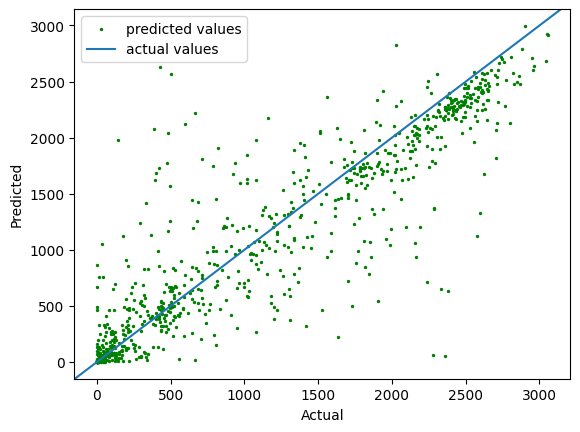

In [105]:
plotgraph(y_test, y_pred_ann_sp)

27/27 [==============================] - 0s 2ms/step


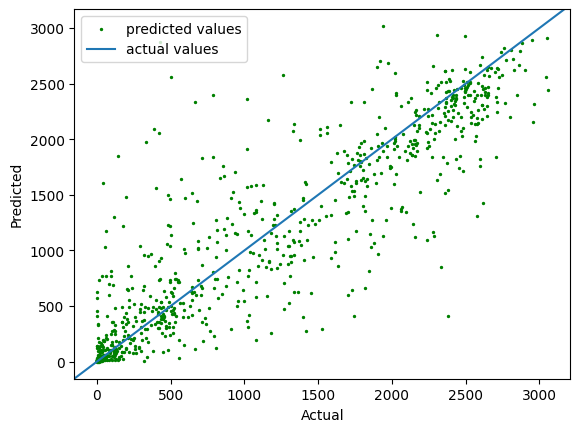

In [122]:
plotgraph(y_test, model0.predict(X_test_scaled))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
rmse = math.sqrt(mse)
print("RMSE : ", rmse, "\nMAE : ", mae, "\nR2 Score : ", r2_score(y_test, model.predict(X_test)))

In [110]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, reg_runtime.predict(X_test))
mae = mean_absolute_error(y_test, reg_runtime.predict(X_test))
rmse = math.sqrt(mse)
print("RMSE : ", rmse, "\nMAE : ", mae, "\nR2 Score : ", r2_score(y_test, reg_runtime.predict(X_test)))

RMSE :  571.5507228799847 
MAE :  497.473469841029 
R2 Score :  0.6423829377080243


In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, reg_gb_sp.predict(X_test))
mae = mean_absolute_error(y_test, reg_gb_sp.predict(X_test))
rmse = math.sqrt(mse)
print("RMSE : ", rmse, "\nMAE : ", mae, "\nR2 Score : ", r2_score(y_test, reg_gb_sp.predict(X_test)))

RMSE :  400.888541979373 
MAE :  244.2287226542215 
R2 Score :  0.8240634944526923


In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, reg_gb_np.predict(X_test))
mae = mean_absolute_error(y_test, reg_gb_np.predict(X_test))
rmse = math.sqrt(mse)
print("RMSE : ", rmse, "\nMAE : ", mae, "\nR2 Score : ", r2_score(y_test, reg_gb_np.predict(X_test)))

NameError: name 'math' is not defined

In [113]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, reg_gb_uc.predict(X_test))
mae = mean_absolute_error(y_test, reg_gb_uc.predict(X_test))
rmse = math.sqrt(mse)
print("RMSE : ", rmse, "\nMAE : ", mae, "\nR2 Score : ", r2_score(y_test, reg_gb_uc.predict(X_test)))

RMSE :  410.13988505125803 
MAE :  249.257771512771 
R2 Score :  0.8158495920610587


In [119]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, model0.predict(X_test))
mae = mean_absolute_error(y_test, model0.predict(X_test))
rmse = math.sqrt(mse)
print("RMSE : ", rmse, "\nMAE : ", mae, "\nR2 Score : ", r2_score(y_test, model0.predict(X_test)))

27/27 [==============================] - 0s 1ms/step
RMSE :  421.6882478706812 
MAE :  268.6700589762128 
R2 Score :  0.8053332985521076


In [116]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
rmse = math.sqrt(mse)
print("RMSE : ", rmse, "\nMAE : ", mae, "\nR2 Score : ", r2_score(y_test, model.predict(X_test)))

27/27 [==============================] - 0s 3ms/step
RMSE :  402.99660110284805 
MAE :  244.38931711361622 
R2 Score :  0.8222083169716261


In [28]:
print("X = ", X_test[2, :],"y = ", np.array(y_test).flat[2])

X =  [-0.94187991  0.28223247  0.96299575 -0.18660612 -0.073874   -0.44485607
  1.15738929 -0.55034363 -0.56231835  0.15444293  1.34178961 -1.75069157
  1.21527466 -1.67275118  1.327054   -1.72781008  1.38973338  0.34050946
 -0.3826605  -1.11363866] y =  2017.5687
[1718.82264761]


In [1]:
import gradio
import gradio as gr
def start(temperature_2_m_above_gnd, relative_humidity_2_m_above_gnd,
       mean_sea_level_pressure_MSL, total_precipitation_sfc,
       snowfall_amount_sfc, total_cloud_cover_sfc,
       high_cloud_cover_high_cld_lay, medium_cloud_cover_mid_cld_lay,
       low_cloud_cover_low_cld_lay, shortwave_radiation_backwards_sfc,
       wind_speed_10_m_above_gnd, wind_direction_10_m_above_gnd,
       wind_speed_80_m_above_gnd, wind_direction_80_m_above_gnd,
       wind_speed_900_mb, wind_direction_900_mb,
       wind_gust_10_m_above_gnd, angle_of_incidence, zenith, azimuth):
    independentvariables = np.array([temperature_2_m_above_gnd, relative_humidity_2_m_above_gnd,
       mean_sea_level_pressure_MSL, total_precipitation_sfc,
       snowfall_amount_sfc, total_cloud_cover_sfc,
       high_cloud_cover_high_cld_lay, medium_cloud_cover_mid_cld_lay,
       low_cloud_cover_low_cld_lay, shortwave_radiation_backwards_sfc,
       wind_speed_10_m_above_gnd, wind_direction_10_m_above_gnd,
       wind_speed_80_m_above_gnd, wind_direction_80_m_above_gnd,
       wind_speed_900_mb, wind_direction_900_mb,
       wind_gust_10_m_above_gnd, angle_of_incidence, zenith, azimuth])
    independentvariables1 = independentvariables.reshape(1, -1)
    op = reg_gb_np.predict(independentvariables1)
    print (op)
    return op

interface = gr.Interface (
fn=start, 
inputs= [ gr.inputs.Number( label = "Temp 2m above ground (-10 to 40)"), gr.inputs.Number(label = "Relative Humidity 2m above ground (0 to 100)"), gr.inputs.Number(label = "Mean Sea Level Pressure (980 to 1100)"), gr.inputs.Number(label = "Total Rainfall (0-5)"), gr.inputs.Number(label = "Total Snowfall (0-5)"), gr.inputs.Number(label = "Total Cloud cover (0-100)"), gr.inputs.Number(label = "High Cloud Cover (0-100)"), gr.inputs.Number(label = "Medium Cloud Cover (0-100)"), gr.inputs.Number(label = "Low Cloud Cover (0-100)"),
         gr.inputs.Number(label ="Shortwave Radiation Backwards (0 to 1000)"), 
        gr.inputs.Number(label ="Windspeed 10m above ground (0 to 100)"), gr.inputs.Number(label ="Wind Direction 10m above ground (0 to 360)"), gr.inputs.Number(label ="Wind Speed 80m above ground(0 to 100)"), gr.inputs.Number(label ="Wind Direction 80m above ground(0 to 360)"), gr.inputs.Number(label ="Wind Speed 900_MB(0 to 100)"), gr.inputs.Number(label ="Wind Direction 900_MB(0 to 360)"), gr.inputs.Number(label ="Wind Gust 10m above ground(0 to 100)"), gr.inputs.Number(label ="Angle of Incidence (0-180)"),
         gr.inputs.Number(label ="Zenith (0 to 180)"), gr.inputs.Number(label ="Azimuthal (0 to 360)")],
outputs = gr.outputs.Textbox(label = "Predicted PV Power Generation"), title = "Solar PV Prediction using AI"
    )
interface.launch(share=True)



C:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app
